In [1]:
import time
import torch
import sys
import os

project_path = os.path.abspath(os.path.join(os.getcwd(), '..', ''))
sys.path.append(project_path)

from python.create_dgl_dataset import TelemacDataset

from modulus.launch.utils import load_checkpoint, save_checkpoint
from python.CustomMeshGraphNet import MeshGraphNet


In [2]:
from hydra.utils import to_absolute_path

In [28]:
dataset = TelemacDataset(
            name="telemac_train",
            data_dir=to_absolute_path('./data/TetQ2500inter_1min_chunk/TetQ2500inter_1min_multimesh_base.bin'),
            dynamic_data_file= to_absolute_path('./data/TetQ2500inter_1min_chunk/TetQ2500inter_1min_0_0-500.pkl'),
            split="train",
            num_samples=1,
            num_steps=400
        )

{'h': tensor([0.4091]), 'u': tensor([0.1759]), 'v': tensor([0.0328]), 'strickler': tensor([20.6630]), 'z': tensor([17.5927]), 'delta_h': tensor([0.0014]), 'delta_u': tensor([0.0007]), 'delta_v': tensor([0.0001]), 'h_std': tensor([0.9793]), 'u_std': tensor([0.5097]), 'v_std': tensor([0.2043]), 'strickler_std': tensor([11.6973]), 'z_std': tensor([13.9987]), 'delta_h_std': tensor([0.0204]), 'delta_u_std': tensor([0.0272]), 'delta_v_std': tensor([0.0148])}
{'xrel': tensor([-2.6318e-09]), 'yrel': tensor([-4.8876e-09]), 'norm': tensor([19.3807]), 'xrel_std': tensor([21.8350]), 'yrel_std': tensor([21.9884]), 'norm_std': tensor([24.1794])}
strickler
z
xrel
yrel
norm


In [29]:
model = MeshGraphNet(
            9,
            3,
            3,
            processor_size=12,
            hidden_dim_processor=64,
            hidden_dim_node_encoder=64,
            hidden_dim_edge_encoder=64,
            hidden_dim_node_decoder=64,
            do_concat_trick=True
        )

In [30]:
load_checkpoint(to_absolute_path("./jupyter"),model)

[10:18:27 - checkpoint - INFO] Loaded model state dictionary /users/daml/vmercier/gnn_modulus_project/jupyter/MeshGraphNet.0.80.mdlus to device cpu
[10:18:27 - checkpoint - INFO] Loaded checkpoint file /users/daml/vmercier/gnn_modulus_project/jupyter/checkpoint.0.80.pt to device cpu


80

In [43]:
ts = 200
with torch.no_grad():
    pred = model(dataset[ts].ndata['x'],dataset[0].edata['x'],dataset[0]).numpy()
groundtruth = dataset[ts].ndata['y'].numpy()

In [44]:
from python.create_dgl_dataset import add_mesh_info
from python.python_code.data_manip.extraction.telemac_file import TelemacFile

import dgl
graphs, _ = dgl.load_graphs('./data/TetQ2500inter_1min_chunk/TetQ2500inter_1min_base.bin') 
mesh_list = ['/projets/aniti-daml/vmercier/simu_valentin/maillage_3.slf']
res_mesh = TelemacFile(mesh_list[0])
X,triangles = add_mesh_info(res_mesh)

In [45]:
import numpy as np 

In [46]:
h_max = max(np.max(groundtruth[:,0]),np.max(pred[:,0]))
h_min = min(np.min(groundtruth[:,0]),np.min(pred[:,0]))

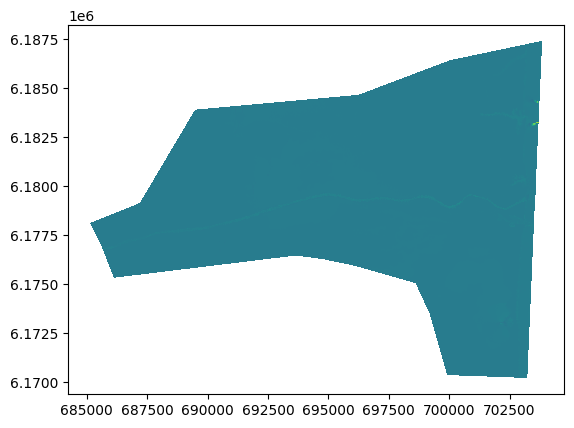

In [47]:
import matplotlib.pyplot as plt
plt.figure()
plt.tripcolor(X[:,0],X[:,1],pred[:,0],triangles=triangles,vmax=h_max,vmin=h_min)
plt.show()

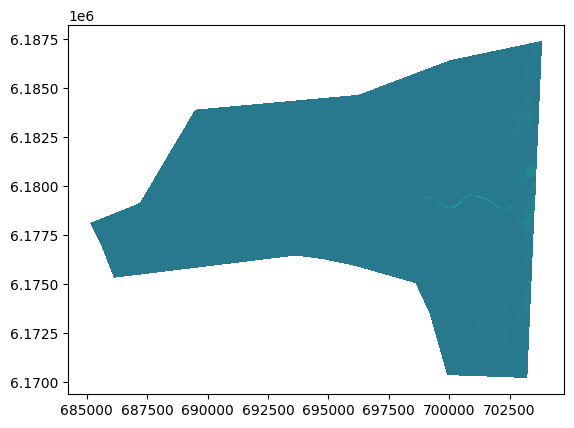

In [48]:
plt.figure()
plt.tripcolor(X[:,0],X[:,1],groundtruth[:,0],triangles=triangles,vmax=h_max,vmin=h_min)
plt.show()